# Problem 1

## Problem 1.1

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# load iris_train.data and iris_test.data
pd_train = pd.read_csv("iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print (le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train = 2 * y_train - 1     # Convert 0/1 to -1/1
y_test = 2 * y_test - 1     # Convert 0/1 to -1/1

['Iris-setosa' 'Iris-versicolor']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70, 4), (70,), (30, 4), (30,))

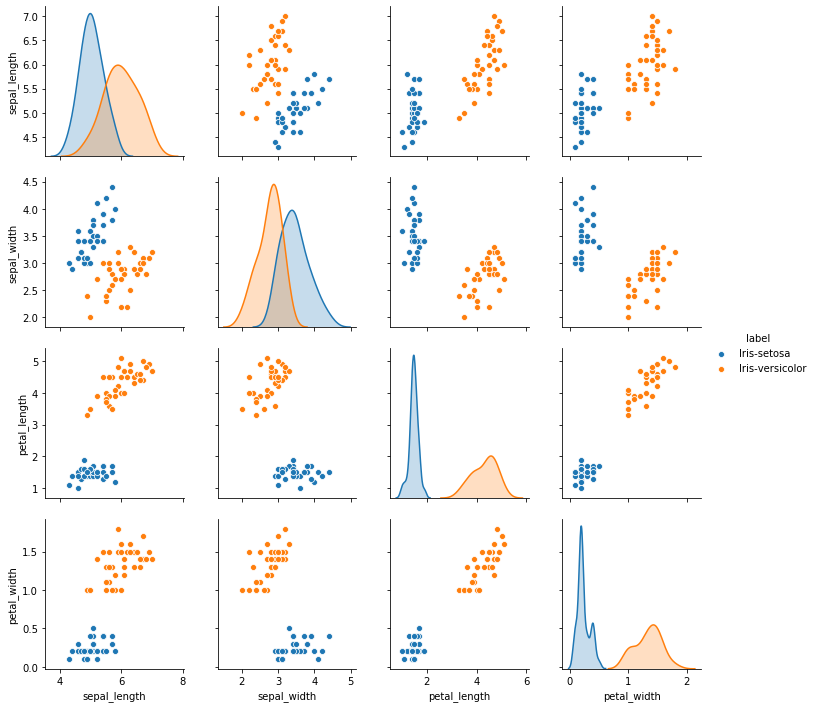

In [3]:
# Problem 1.1 Dataset visualization
%matplotlib inline
import seaborn as sns
g = sns.pairplot(pd_train,hue="label")   ### To be filled. ### pair plot
g

- They can be linearly separable as wee can see from the graphs.

In [4]:
# Convert numpy array into PyTorch tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).reshape(-1, 1).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).reshape(-1, 1).float()

## Problem 1.2

[0.5]
[0.5, 0.5]
[0.5, 0.5, 0.0]
Test error: 0.0


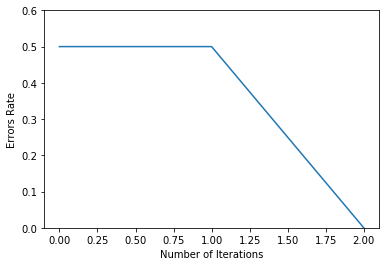

Decision boundary:
-2.600x0+-8.200x1+10.400x2+4.400x3+-2.000=0
Learning rate:  1
The number of iterations for convergence:  2


In [5]:
# Initialization.
W   = torch.zeros(4, 1).float()#np.zeros([4])  # Weight.
b   = 0.0            # Bias.
lam = 1    # Lambda (Learning rate). It controls magnitude of weight/bias update.

# Get the number of correct predictions.
def correct(X, Y, W, b):
    # X: Feature matrix. Shape: [n, 4]. (n is the number of points)
    # Y: Label matrix.   Shape: [n, 1].
    # W: Weight matrix.  Shape: [4, 1].
    # b: Bias.           Shape: A scalar.
    count = 0
    for i in range(len(X)):
        Xi = X[i] ### To be filled. ###             # Get the features of the data point.
        Yi = Y[i] ### To be filled. ###             # Get the label.
        f  = (Xi.matmul(W) + b)  ### To be filled. ###        # Get the prediction.

        if f >= 0:
            Yi_pred = 1
        else:
            Yi_pred = -1
        if Yi_pred == Yi:               # Compare prediction and label.
            count += 1 ### To be filled. ###
    # Return the number of correct predictions.
    return count

# Perceptron learning algorithm.
error_rate = []
while True:
    for i in range(len(X_train)):   # Iterate over all data points.
        Xi = X_train[i] ### To be filled. ###             # Get the features of the data point.
        Yi = y_train[i] ### To be filled. ###             # Get the label.
        f  = (Xi.matmul(W) + b)  ### To be filled. ###        # Get the prediction.

        if f >= 0:
            Yi_pred = 1
        else:
            Yi_pred = -1
        if Yi_pred != Yi:               # Compare prediction and label.
            W += (Xi.view(-1,1)) * (lam * (Yi - Yi_pred)) ### To be filled. ### # Update weight and bias.
            b += lam * (Yi - Yi_pred)        ### To be filled. ###    
                      
    # Get the number of correct predictions on training set.
    num_correct = correct(X_train, y_train, W, b)
    # Record the error rate.
    error_rate.append(1 - float(num_correct)/len(X_train))
    print(error_rate)
    # If all training data points are predicted correctly, jump out.
    if num_correct == len(X_train):
        break
        
# Compute the error rate on the test set.
print('Test error: {}'.format(
      (1 - float(correct(X_test, y_test, W, b)) / len(X_test))))

# Plot error rate curve.
plt.ylim(ymax = 0.6)
plt.plot(error_rate)
plt.xlabel('Number of Iterations')
plt.ylabel('Errors Rate')
plt.show()

# Decision boundary.
print('Decision boundary:')
w0, w1, w2, w3, b = W[0,0].item(), W[1,0].item(), W[2,0].item(), W[3,0].item(), b.item()
print('{:.3f}x0+{:.3f}x1+{:.3f}x2+{:.3f}x3+{:.3f}=0'.format(
    w0, w1, w2, w3,b ))
print('Learning rate: ', lam)
print('The number of iterations for convergence: ', len(error_rate)-1)

## Problem 1.3

In [6]:
def test_network(X_test, W, b, lam):
    predictions = []
    for x in X_test:
        preds = (x.matmul(W) + b)
        y_pred = 1 if preds >= 0 else -1
        predictions.append(y_pred)
    return predictions
    
def get_precision(preds,labels):
    True_Pos = len([preds[i] for i in range(len(preds)) if preds[i] == labels[i] and preds[i] == 1])
    Test_Positive = len([x for x in preds if x == 1])
    return True_Pos/Test_Positive

def get_recall(preds,labels):
    True_Pos = len([preds[i] for i in range(len(preds)) if preds[i] == labels[i] and preds[i] == 1])
    Condition_Pos = True_Pos + len([preds[i] for i in range(len(preds)) if preds[i]== 0 and labels[i]==1])
    return True_Pos/Condition_Pos

    
def calculate_metrics(preds,labels,data_type):
    labels_np = labels.squeeze(-1).numpy()
    accuracy = sum((preds == labels_np).astype(int))/len(labels_np)*100
    print(f'Accuracy on the {data_type} is {accuracy:.2f}%')
    precision = get_precision(preds,labels)
    print(f'Precision is {precision}')
    recall = get_recall(preds,labels)
    print(f'Recall is {recall}')
    F_val = 2*precision*recall/(precision+recall)
    print(f'F-value is {F_val}')

In [7]:
train_preds = test_network(X_train, W, b, lam)

In [8]:
calculate_metrics(train_preds, y_train, 'train_data')

Accuracy on the train_data is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0


In [9]:
test_preds = test_network(X_test, W, b, lam)

In [10]:
calculate_metrics(test_preds, y_test, 'test_data')

Accuracy on the test_data is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0


- I trained the classifier from the scrach in multiple times, and everytime the classifier finds a decision boundary that separates the data points and stops immediately. Some decision boundaries turn out to be better than other decision boundaries and hence we get different results on the test set each time. The best result obtained is 100% accuracy on the test set and convergence on train set in 3 epochs, which is the givien condition.

In [11]:
print('The decision boundary is:')
print(f'Y = {b:.2f} + {W[0][0]:.2f}*sepal_length + {W[1][0]:.2f}*sepal_width + {W[2][0]:.2f}*petal_length + {W[3][0]:.2f}*petal_width')

The decision boundary is:
Y = -2.00 + -2.60*sepal_length + -8.20*sepal_width + 10.40*petal_length + 4.40*petal_width


## Problem 1.4

In [12]:
X_mean = X_train.mean(0)
X_var = X_train.var(0)
X_train_normalized = (X_train - X_mean)/X_var
X_train_normalized_np = X_train_normalized.numpy()

X_mean_test = X_test.mean(0)
X_var_test = X_test.var(0)
X_test_normalized = (X_test - X_mean_test)/X_var_test
X_test_normalized_np = X_test_normalized.numpy()

y_train_z_score = pd_train.as_matrix(columns=["label"])
y_test_z_score = pd_test.as_matrix(columns=["label"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [13]:
pd_train_normalized = pd.DataFrame(np.hstack((X_train_normalized_np,y_train_z_score.reshape(len(X_train_normalized_np),1))),columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

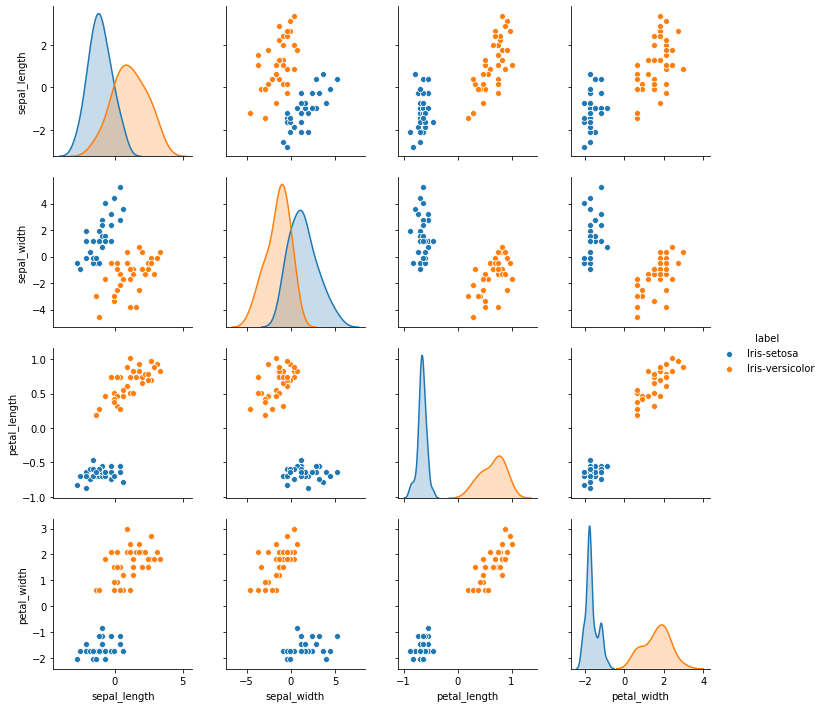

In [14]:
# Problem 1.1 Dataset visualization
%matplotlib inline
import seaborn as sns
g = sns.pairplot(pd_train_normalized,hue="label")  
g

In [15]:
# Convert numpy array into PyTorch tensor
X_train_normalized = torch.from_numpy(X_train_normalized_np).float()
X_test_normalized = torch.from_numpy(X_test_normalized_np).float()

In [16]:
# Initialization.
W   = torch.zeros(4, 1).float()#np.zeros([4])  # Weight.
b   = 0.0            # Bias.
lam = 1    # Lambda (Learning rate). It controls magnitude of weight/bias update.

# Get the number of correct predictions.
def correct(X, Y, W, b):
    # X: Feature matrix. Shape: [n, 4]. (n is the number of points)
    # Y: Label matrix.   Shape: [n, 1].
    # W: Weight matrix.  Shape: [4, 1].
    # b: Bias.           Shape: A scalar.
    count = 0
    for i in range(len(X)):
        Xi = X[i] ### To be filled. ###             # Get the features of the data point.
        Yi = Y[i] ### To be filled. ###             # Get the label.
        f  = (Xi.matmul(W) + b)  ### To be filled. ###        # Get the prediction.

        if f >= 0:
            Yi_pred = 1
        else:
            Yi_pred = -1
        if Yi_pred == Yi:               # Compare prediction and label.
            count += 1 ### To be filled. ###
    # Return the number of correct predictions.
    return count

# Perceptron learning algorithm.
error_rate = []
while True:
    for i in range(len(X_train_normalized)):   # Iterate over all data points.
        Xi = X_train_normalized[i] ### To be filled. ###             # Get the features of the data point.
        Yi = y_train[i] ### To be filled. ###             # Get the label.
        f  = (Xi.matmul(W) + b)  ### To be filled. ###        # Get the prediction.

        if f >= 0:
            Yi_pred = 1
        else:
            Yi_pred = -1
        if Yi_pred != Yi:               # Compare prediction and label.
            W += (Xi.view(-1,1)) * (lam * (Yi - Yi_pred)) ### To be filled. ### # Update weight and bias.
            b += lam * (Yi - Yi_pred)        ### To be filled. ###    
                      
    # Get the number of correct predictions on training set.
    num_correct = correct(X_train_normalized, y_train, W, b)
    # Record the error rate.
    error_rate.append(1 - float(num_correct)/len(X_train_normalized))
    #print(error_rate)
    # If all training data points are predicted correctly, jump out.
    if num_correct == len(X_train_normalized):
        break        
# # Compute the error rate on the test set.
# print('Test error: {}'.format(
#       (1 - float(correct(X_test_normalized, y_test, W, b)) / len(X_test_normalized))))

# # Plot error rate curve.
# plt.ylim(ymax = 0.6)
# plt.plot(error_rate)
# plt.title('Normalized')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Errors Rate')
# plt.show()

# Decision boundary.
print('Decision boundary(Normalized):')
w0, w1, w2, w3, b = W[0,0].item(), W[1,0].item(), W[2,0].item(), W[3,0].item(), b.item()
print('{:.3f}x0+{:.3f}x1+{:.3f}x2+{:.3f}x3+{:.3f}=0'.format(
    w0, w1, w2, w3,b ))
# print('Learning rate: ', lam)
# print('The number of iterations for convergence: ', len(error_rate)-1)

Decision boundary(Normalized):
1.940x0+-3.128x1+1.381x2+3.513x3+-2.000=0


In [17]:
def test_network(X_test, W, b, lam):
    predictions = []
    for x in X_test:
        preds = (x.matmul(W) + b)
        y_pred = 1 if preds >= 0 else -1
        predictions.append(y_pred)
    return predictions
    
def get_precision(preds,labels):
    True_Pos = len([preds[i] for i in range(len(preds)) if preds[i] == labels[i] and preds[i] == 1])
    Test_Positive = len([x for x in preds if x == 1])
    return True_Pos/Test_Positive

def get_recall(preds,labels):
    True_Pos = len([preds[i] for i in range(len(preds)) if preds[i] == labels[i] and preds[i] == 1])
    Condition_Pos = True_Pos + len([preds[i] for i in range(len(preds)) if preds[i]== 0 and labels[i]==1])
    return True_Pos/Condition_Pos

    
def calculate_metrics(preds,labels,data_type):
    labels_np = labels.squeeze(-1).numpy()
    accuracy = sum((preds == labels_np).astype(int))/len(labels_np)*100
    print(f'Accuracy on the {data_type} is {accuracy:.2f}%')
    precision = get_precision(preds,labels)
    print(f'Precision is {precision}')
    recall = get_recall(preds,labels)
    print(f'Recall is {recall}')
    F_val = 2*precision*recall/(precision+recall)
    print(f'F-value is {F_val}')

In [18]:
train_preds = test_network(X_train_normalized, W, b, lam)
calculate_metrics(train_preds, y_train, 'train_data(normalized)')

Accuracy on the train_data(normalized) is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0


In [19]:
test_preds = test_network(X_test_normalized, W, b, lam)
calculate_metrics(test_preds, y_test, 'test_data(normalized)')

Accuracy on the test_data(normalized) is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0


In [20]:
print('The decision boundary is (normalized):')
print(f'Y = {b:.2f} + {W[0][0]:.2f}*sepal_length + {W[1][0]:.2f}*sepal_width + {W[2][0]:.2f}*petal_length + {W[3][0]:.2f}*petal_width')

The decision boundary is (normalized):
Y = -2.00 + 1.94*sepal_length + -3.13*sepal_width + 1.38*petal_length + 3.51*petal_width


- We see here that it gets again 100% accuracy on the test set. This is because it finds a classifier that perfectly classifies on train set so it doesn't improve it further. The decision boundary is slightly changed. 